<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

Research Question


*   Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018


Bonus Questions



*   What is the most popular hour for returning cars?
*   What station is the most popular?
     Overall?
     At the most popular picking hour?


*  What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?

   Overall?
   At the most popular picking hour?

*  Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? (that could be asked earlier to push students to write modular code that can be used to query different things)





## 1.0 Importing our Libraries

In [65]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd


# Importing the numpy library
#
import numpy as np


## 1.1 Reading the Dataset from the url




In [ ]:
# Loading the electric cars dataset from the url = 'http://bit.ly/Autolibdataset'
url = 'http://bit.ly/Autolibdataset'
df = pd.read_csv(url, index_col = 0)

df


In [68]:
df= pd.read_csv('Autolib.csv')
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


## 1.2 Previewing our Dataset


In [69]:
# Let's preview the first 5 rows of our data
# 
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


## 1.3 Accessing Information about our Dataset

We might need to convert columns to the respective datatypes ie. if there are payment columns we could convert them from string to float. This observation can be made by accessing information about the dataset.

In [70]:
# Getting to know more about the dataset by accessing its information
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

## 1.4 Cleaning our Dataset

Let us perform data cleaning procedures below providing a documentation for our actions. 

### 1.41) Validity: 

In [71]:
# Data Cleaning Action: Removing  Irrelevant Data
# Explanation:Displayed comment and Scheduled at column is not relevant to our calculations hence will be dropped

df.drop(['Address','Charge Slots','Charging Status','Displayed comment','Scheduled at', 'Slots','Geo point'], axis = 1, inplace = True)
df

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,ID,Kind,Postal code,Public name,Rental status,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43
1,6,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24
2,3,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent,2018,4,3,20,14
3,3,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent,2018,4,4,4,37
4,3,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,station,ok,nonexistent,2018,4,6,11,26
4996,4,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,station,ok,nonexistent,2018,4,4,16,56
4997,1,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,station,ok,nonexistent,2018,4,1,7,1
4998,2,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,nonexistent,2018,4,4,17,27


In [72]:
# Procedure 2:# Syntax Errors
# Data Cleaning Action:We can also use str.replace() function on the respective column to strip all the spaces 
#
df.columns = df.columns.str.strip().str.replace(' ','_')
df.columns


Index(['Cars', 'Bluecar_counter', 'Utilib_counter', 'Utilib_1.4_counter',
       'City', 'ID', 'Kind', 'Postal_code', 'Public_name', 'Rental_status',
       'Station_type', 'Status', 'Subscription_status', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

### 1.42) Accuracy 

In [73]:
# Data Cleaning Action: dropping the cars column
# Explanation:
#
df.drop('Cars', axis=1, inplace=True)
df

,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,City,ID,Kind,Postal_code,Public_name,Rental_status,Station_type,Status,Subscription_status,year,month,day,hour,minute
0,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24
2,3,0,2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,station,ok,nonexistent,2018,4,3,20,14
3,3,1,0,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,station,ok,nonexistent,2018,4,4,4,37
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,station,ok,nonexistent,2018,4,6,11,26
4996,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,station,ok,nonexistent,2018,4,4,16,56
4997,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,station,ok,nonexistent,2018,4,1,7,1
4998,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,nonexistent,2018,4,4,17,27


### 1.43) Completeness 

In [74]:
# Procedure 1:Checking/ Counting Missing Values 
# Data Cleaning Action:
#
df.isnull().sum()

#There are no missing values

Bluecar_counter        0
Utilib_counter         0
Utilib_1.4_counter     0
City                   0
ID                     0
Kind                   0
Postal_code            0
Public_name            0
Rental_status          0
Station_type           0
Status                 0
Subscription_status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

### 1.44) Consistency: 

In [75]:
# Procedure 1: Duplicates
# Data Cleaning Action: These should be simply removed.
#
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

### 1.45) Uniformity: <font color="green">Challenges<font/>

In [76]:
# Procedure 1: Standardization
df.columns

Index(['Bluecar_counter', 'Utilib_counter', 'Utilib_1.4_counter', 'City', 'ID',
       'Kind', 'Postal_code', 'Public_name', 'Rental_status', 'Station_type',
       'Status', 'Subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [77]:
# Data Cleaning Action: converting column names to lower case

df.columns = map(str.lower, df.columns)
df.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'public_name', 'rental_status', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

### 1.47) Finding Outliers: 

In [78]:
# Checking for outliers using the inter quantile range
#
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

,bluecar_counter,city,day,hour,id,kind,minute,month,postal_code,public_name,rental_status,station_type,status,subscription_status,utilib_1.4_counter,utilib_counter,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'

df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df2.shape)

# Printing the shape of our old dataset

print(df.shape)

#Outliers successfully removed

(4210, 17)
(5000, 17)


### 1.47) Date-Time conversion 

In [80]:
# Data Cleaning Action: Date time Conversion

# Let's convert our strings to Datetime data type
# importing datatime module
from datetime import datetime

#combining the year, month, day, hour, minute into one column

df2['period']= pd.to_datetime(df2[['month', 'day', 'year','hour','minute']])
df2['period'].astype=('int') 
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,year,month,day,hour,minute,period
0,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
5,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,station,ok,nonexistent,2018,4,6,7,2,2018-04-06 07:02:00
6,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,station,closed,nonexistent,2018,4,8,18,20,2018-04-08 18:20:00


In [81]:
#deleting year, month, day, hour, minute column
df2=df2.drop(['year','month', 'day', 'minute'], axis=1)
df2.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_1.4_counter', 'city', 'id',
       'kind', 'postal_code', 'public_name', 'rental_status', 'station_type',
       'status', 'subscription_status', 'hour', 'period'],
      dtype='object')

### Exporting the Cleaned Dataset

In [82]:
# Let's export our dataframe into a csv file 
#
df2.to_csv('Autolib2.csv')

Research Question

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

In [83]:
# Loading the cars dataset from the csv file
df2 = pd.read_csv('Autolib2.csv',index_col = 0)
df2.head(5)


#print(df2.shape)

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,hour,period
0,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,7,2018-04-06 07:24:00
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,17,2018-04-08 17:23:00
5,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,station,ok,nonexistent,7,2018-04-06 07:02:00
6,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,station,closed,nonexistent,18,2018-04-08 18:20:00


In [84]:
#Selecting the month of April 2018.
start_date = '2018-04-01 00:00:00'
end_date = '2018-04-30 00:00:00'

#set the mask -- we can then apply this to the df to filter it

mask = (df2['period'] > start_date) & (df2['period'] <= end_date)
#assign mask to df to return the rows with period between our specified start/end dates

df2 = df2.loc[mask]
df2

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,hour,period
0,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,7,2018-04-06 07:24:00
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,17,2018-04-08 17:23:00
5,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,station,ok,nonexistent,7,2018-04-06 07:02:00
6,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,station,closed,nonexistent,18,2018-04-08 18:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,0,0,Colombes,colombes-menelotte-8,STATION,92700,Colombes/MÃ©nelotte/8,operational,station,ok,nonexistent,11,2018-04-06 11:26:00
4996,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,station,ok,nonexistent,7,2018-04-01 07:01:00
4998,2,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,station,ok,nonexistent,17,2018-04-04 17:27:00


In [85]:
#subsetting the data frame to only select only stations in Paris
df2_Paris = df2[(df2.city == 'Paris')]
df2_Paris

,bluecar_counter,utilib_counter,utilib_1.4_counter,city,id,kind,postal_code,public_name,rental_status,station_type,status,subscription_status,hour,period
0,0,0,0,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,station,ok,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,station,ok,nonexistent,7,2018-04-06 07:24:00
4,3,0,0,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,station,ok,nonexistent,17,2018-04-08 17:23:00
5,0,0,0,Paris,paris-voltaire-8,STATION,75011,Paris/Voltaire/8,operational,station,ok,nonexistent,7,2018-04-06 07:02:00
6,0,0,0,Paris,paris-citroencevennes-parking,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,station,closed,nonexistent,18,2018-04-08 18:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0,0,0,Paris,paris-ivry-3,STATION,75013,Paris/Ivry/3,operational,station,ok,nonexistent,23,2018-04-09 23:01:00
4994,0,0,0,Paris,paris-rocroy-15,STATION,75010,Paris/Rocroy/15,operational,station,ok,nonexistent,20,2018-04-01 20:49:00
4996,4,0,0,Paris,paris-dantzig-37,STATION,75015,Paris/Dantzig/37,operational,station,ok,nonexistent,16,2018-04-04 16:56:00
4997,1,0,0,Paris,paris-bac-142,STATION,75007,Paris/Bac/142,operational,station,ok,nonexistent,7,2018-04-01 07:01:00


In [87]:
#most popular hour of the day for picking shared electric blue car in Paris 
#using the diff after selecting the required columns and then deleting the first row of each person which is not relevant.

cols = ['id', 'bluecar_counter', 'hour', 'kind']
df3_Paris = df2_Paris[cols]
df3_Paris['time_diff'] = df2_Paris['hour'].diff()
df3_Paris.loc[df2_Paris.bluecar_counter != df2_Paris.bluecar_counter.shift(), 'time_diff'] = None
df3_Paris

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,bluecar_counter,hour,kind,time_diff
0,paris-suffren-2,0,11,STATION,NaN
1,paris-raymondlosserand-145,6,7,STATION,NaN
4,paris-portedechamperret-6,3,17,PARKING,NaN
5,paris-voltaire-8,0,7,STATION,NaN
6,paris-citroencevennes-parking,0,18,PARKING,11.0
...,...,...,...,...,...
4992,paris-ivry-3,0,23,STATION,2.0
4994,paris-rocroy-15,0,20,STATION,-3.0
4996,paris-dantzig-37,4,16,STATION,NaN
4997,paris-bac-142,1,7,STATION,NaN


In [88]:
dx=df3_Paris.groupby('bluecar_counter')['hour'].value_counts()
dx

bluecar_counter  hour
0                2       53
                 3       52
                 7       47
                 16      47
                 23      47
                         ..
6                23       2
                 5        1
                 16       1
7                3        1
                 17       1
Name: hour, Length: 170, dtype: int64

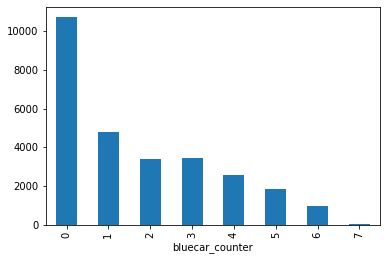

In [89]:
df3_Paris.groupby(['bluecar_counter'])['hour'].sum().plot(kind = 'bar')